('n11', 'n22', 'n26', 'n32', 'n44', 'n2', 'n48', 'OLQDR', 'URYDR', 'AFDR', 'RIAR', 'n64', 'n14', 'n15', 'n52', 'n59', 'URBR', 'OLLR', 'URAVL', 'n23', 'n7', 'n8', 'n24', 'n46', 'n47', 'n13', 'n54', 'n50', 'n69', 'n58', 'n37', 'n57', 'AQR', 'n1', 'n4', 'M3R', 'IL1VR', 'OLQVR', 'AVER', 'n38', 'n39', 'n42', 'n49', 'IL1VL', 'n16', 'URYDL', 'AVAR', 'n45', 'n55', 'n60', 'n62', 'n3', 'n5', 'n36', 'n40', 'n41', 'n53', 'n68', 'n25', 'n63', 'n65', 'RMDVR', 'n35', 'n67', 'n66', 'n51', 'n56', 'RMER', 'SMDVR', 'n61', 'AVDR', 'RIVR', 'ASGR', 'n27')


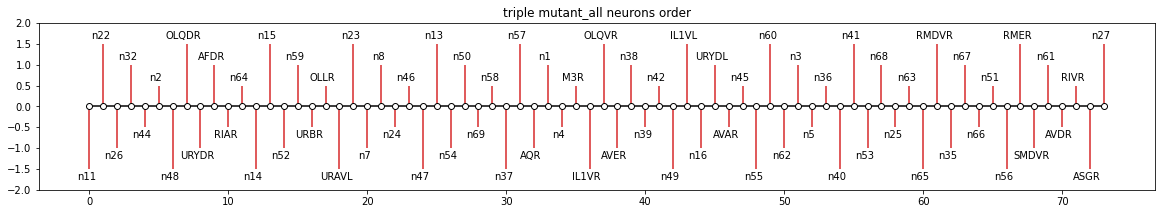

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# set the folder path and suffix
folder_path = "./"
suffix = "*_peak_baseline.xlsx"
excel_files = glob.glob(folder_path + "/" + suffix)

# create empty lists to store neuron names and timepoints
names=[]
timepoints=[]

for file in excel_files:
    df = pd.read_excel(file, sheet_name="peak", usecols=[0, 1])
    names += df.iloc[:, 0].tolist()
    timepoints += df.iloc[:, 1].tolist()
# print(names, timepoints)

# sort names and timepoints based on timepoints
names, timepoints = zip(*sorted(zip(names, timepoints), key=lambda x: x[1]))
print(names)

# create levels
levels = np.tile([-1.5, 1.5, -1, 1, -0.5, 0.5],
                 int(np.ceil(len(timepoints)/6)))[:len(timepoints)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 6))
ax.set(title="triple mutant_all neurons order")
ax.set_ylim(-2,2)

ax.vlines(range(len(timepoints)), 0, levels, color="tab:red")  # The vertical stems.
ax.set_aspect(3)
ax.plot(range(len(timepoints)), np.zeros_like(timepoints), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for i, (n, t, l) in enumerate(zip(names, timepoints, levels)):
    ax.annotate(n, xy=(i, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top", fontsize=10)
    
plt.savefig("neuron_order.jpg", dpi=300, bbox_inches="tight")    
plt.show()

In [40]:
names

('n11',
 'n22',
 'n26',
 'n32',
 'n44',
 'n2',
 'n48',
 'OLQDR',
 'URYDR',
 'AFDR',
 'RIAR',
 'n64',
 'n14',
 'n15',
 'n52',
 'n59',
 'URBR',
 'OLLR',
 'URAVL',
 'n23',
 'n7',
 'n8',
 'n24',
 'n46',
 'n47',
 'n13',
 'n54',
 'n50',
 'n69',
 'n58',
 'n37',
 'n57',
 'AQR',
 'n1',
 'n4',
 'M3R',
 'IL1VR',
 'OLQVR',
 'AVER',
 'n38',
 'n39',
 'n42',
 'n49',
 'IL1VL',
 'n16',
 'URYDL',
 'AVAR',
 'n45',
 'n55',
 'n60',
 'n62',
 'n3',
 'n5',
 'n36',
 'n40',
 'n41',
 'n53',
 'n68',
 'n25',
 'n63',
 'n65',
 'RMDVR',
 'n35',
 'n67',
 'n66',
 'n51',
 'n56',
 'RMER',
 'SMDVR',
 'n61',
 'AVDR',
 'RIVR',
 'ASGR',
 'n27')

In [41]:
names = [name for name in names if not name.startswith('n')]

In [47]:
df = pd.DataFrame({'Neurons': names})
df.to_excel('names.xlsx', index=False)